# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from newsapi import NewsApiClient
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/patrick/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv()
news_api_key = os.getenv("NEWS_API")
print(news_api_key)

8723b45cce02461aa3574b4ba46c667b


In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=news_api_key)


In [4]:
# Fetch the Bitcoin news articles
bitcoin_articles = newsapi.get_everything(q="bitcoin")
bitcoin_articles['totalResults']

12760

In [5]:
# Fetch the Ethereum news articles
ethereum_articles = newsapi.get_everything(q="ethereum")
ethereum_articles['totalResults']

4540

In [6]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = []

for article in bitcoin_articles["articles"]:
    try: 
        text = article["content"]
        date = article["publishedAt"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({'Compound':compound, 'Negative':neg, 'Neutral':neu, 'Positive':pos, 'text':text})
        
    except AttributeError: 
        pass
btc_df= pd.DataFrame(btc_sentiments)

btc_df.head()

,Compound,Negative,Neutral,Positive,text
0,-0.2732,0.063,0.937,0.000,A similar hoax earlier this year tied Walmart ...
1,0.3612,0.000,0.904,0.096,Theres a big new presence slurping up power fr...
2,0.0000,0.000,1.000,0.000,"For all the talk of democratizing finance, the..."
3,0.5719,0.000,0.847,0.153,"In keeping with a previous announcement, AMC t..."
4,0.0000,0.000,1.000,0.000,Representation of cryptocurrency Bitcoin is pl...


In [7]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiments = []

for article in ethereum_articles["articles"]:
    try: 
        text = article["content"]
        date = article["publishedAt"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({'Compound':compound, 'Negative':neg, 'Neutral':neu, 'Positive':pos, 'text':text})
        
    except AttributeError: 
        pass
eth_df= pd.DataFrame(eth_sentiments)

eth_df.head()

,Compound,Negative,Neutral,Positive,text
0,0.0000,0.0,1.000,0.000,A new cross-chain bridge is currently connecte...
1,0.0000,0.0,1.000,0.000,Mark Cuban has some advice for people who are ...
2,0.5719,0.0,0.847,0.153,"In keeping with a previous announcement, AMC t..."
3,0.4588,0.0,0.906,0.094,Ethereum and bitcoin are the two biggest crypt...
4,0.5267,0.0,0.907,0.093,Elon Musk\r\npicture alliance / Getty Images\r...


In [9]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.220215,0.003150,0.942300,0.054550
std,0.292918,0.014087,0.065262,0.066502
min,-0.273200,0.000000,0.801000,0.000000
25%,0.000000,0.000000,0.896500,0.000000
50%,0.000000,0.000000,0.968500,0.000000
75%,0.481000,0.000000,1.000000,0.103500
max,0.755800,0.063000,1.000000,0.199000


In [11]:
# Describe the Ethereum Sentiment
eth_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.0,20.000000,20.000000
mean,0.280475,0.0,0.936850,0.063150
std,0.308037,0.0,0.074661,0.074661
min,0.000000,0.0,0.779000,0.000000
25%,0.000000,0.0,0.902500,0.000000
50%,0.180600,0.0,0.964000,0.036000
75%,0.530600,0.0,1.000000,0.097500
max,0.822500,0.0,1.000000,0.221000


### Questions:

Q: Which coin had the highest mean positive score?

A: Eth has the highest Positive

Q: Which coin had the highest compound score?

A:  Both are equal 

Q. Which coin had the highest positive score?

A: Eth had the highest positive max score

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [13]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [14]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_addons = {'due', 'would','could', 'also', 'said'}
sw = sw.union(sw_addons)
print(sw)

{'which', 'i', 'my', 'having', 'to', 'off', 'than', "don't", 'too', 'am', 'doesn', "you'll", 'only', "isn't", "mustn't", 'their', 'there', 'same', 'it', 'on', 'other', 'haven', 'wouldn', 'them', 'd', 'this', 've', 'by', 'its', 'been', 'were', 'then', 'above', 'from', 'don', 'did', 'once', 'me', 'isn', 'ain', "she's", 'your', 'was', 'if', 'o', 'in', 'against', 'here', 'myself', 'under', 'while', 'we', 'hers', 'are', 'does', 'where', 'up', "you'd", 'over', 'until', 'some', 'but', 'now', 'the', 'at', 'these', 'each', 'after', 'themselves', 'doing', 'hasn', 'll', 'itself', "mightn't", 'mightn', 'own', 'who', 'being', 'she', 'do', 'as', 'also', 'has', 'couldn', "haven't", "hadn't", 'himself', 'herself', 'very', "shouldn't", 'any', 'for', "couldn't", 'yours', 'our', 'won', 'between', 'y', 'during', 'not', 'because', 's', 'he', 'is', 'few', 'should', 'below', 'why', 'both', 'that', "won't", 't', 'shan', 'his', 'had', 'into', 'of', "hasn't", "shan't", 'could', "you've", 'when', 'an', "you're",

In [15]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    text_cleaned = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(text_cleaned)
    
    # Lemmatize words into root words
    lemmetized_words = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    lemmetized_words = [word.lower() for word in lemmetized_words]
    
    # Remove the stop words
    tokens = [word for word in lemmetized_words if word not in sw]
    
    return tokens

In [18]:
# Create a new tokens column for Bitcoin
def getTokens(row):
    return tokenizer(row['text'])
btc_df['tokens'] = btc_df.apply(getTokens, axis=1)
print(btc_df.iloc[0]['text'])
print(btc_df.iloc[0]['tokens'])

A similar hoax earlier this year tied Walmart to Litecoin
If you buy something from a Verge link, Vox Media may earn a commission. See our ethics statement.
Photo Illustration by Thiago Prudencio/S… [+1900 chars]
['similar', 'hoax', 'earlier', 'year', 'tied', 'walmart', 'litecoinif', 'buy', 'something', 'verge', 'link', 'vox', 'media', 'may', 'earn', 'commission', 'see', 'ethic', 'statementphoto', 'illustration', 'thiago', 'prudencios', 'char']


In [20]:
# Create a new tokens column for Ethereum
def getTokens(row):
    return tokenizer(row['text'])
eth_df['tokens'] = eth_df.apply(getTokens, axis=1)
print(eth_df.iloc[0]['text'])
print(eth_df.iloc[0]['tokens'])

A new cross-chain bridge is currently connected to Ethereum through a cross-chain bridge, with Cardano and other public chains to come in the future.
Nervos today announced that the Force Bridge is … [+3114 chars]
['new', 'crosschain', 'bridge', 'currently', 'connected', 'ethereum', 'crosschain', 'bridge', 'cardano', 'public', 'chain', 'come', 'futurenervostoday', 'announced', 'force', 'bridge', 'char']


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [22]:
from collections import Counter
from nltk import ngrams

In [24]:
# Generate the Bitcoin N-grams where N=2
bitcoin_all_text = ''.join(btc_df['text'])
bitcoin_all_text_processed = tokenizer(bitcoin_all_text)
bitcoin_bigrams = ngrams(bitcoin_all_text_processed, n=2)
#LIST BTC BIGRAM

In [27]:
# Generate the Ethereum N-grams where N=2
ethereum_all_text = ''.join(eth_df['text'])
ethereum_all_text_processed = tokenizer(ethereum_all_text)
ethereum_bigrams = ngrams(ethereum_all_text_processed, n=2)
#LIST ETH BIGRAM

In [28]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [29]:
# Use token_count to get the top 10 words for Bitcoin
bitcoin_top_10 = pd.DataFrame(list(dict(token_count(bitcoin_bigrams, N=10)).items()), columns=['bigram','count'])
bitcoin_top_10

,bigram,count
0,"(reuters, bitcoin)",5
1,"(cryptocurrency, bitcoin)",4
2,"(illustration, taken)",4
3,"(oct, reuters)",4
4,"(exchangetraded, fund)",4
5,"(representation, virtual)",3
6,"(virtual, cryptocurrency)",3
7,"(bitcoin, seen)",3
8,"(seen, picture)",3
9,"(picture, illustration)",3


In [30]:
# Use token_count to get the top 10 words for Ethereum
ethereum_top_10 = pd.DataFrame(list(dict(token_count(ethereum_bigrams, N=10)).items()), columns=['bigram','count'])
ethereum_top_10

,bigram,count
0,"(illustration, taken)",4
1,"(taken, june)",4
2,"(bitcoin, ethereum)",3
3,"(ethereum, dogecoin)",3
4,"(crosschain, bridge)",2
5,"(new, york)",2
6,"(cryptocurrencies, bitcoin)",2
7,"(dogecoin, ripple)",2
8,"(ripple, litecoin)",2
9,"(litecoin, placed)",2


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [36]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

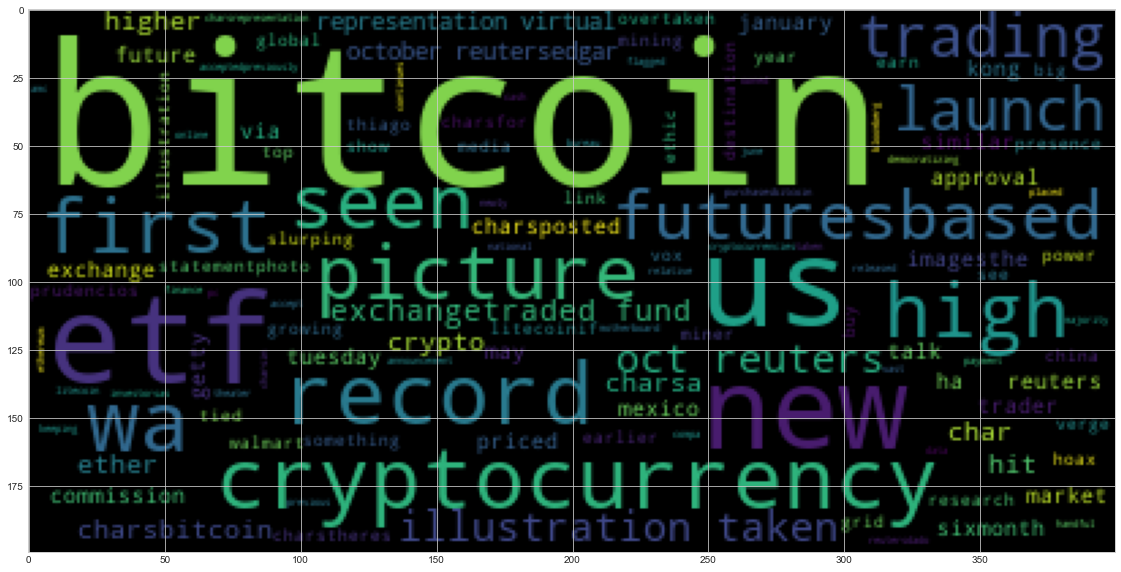

In [37]:
# Generate the Bitcoin word cloud
btc_wc = WordCloud().generate(' '.join(bitcoin_all_text_processed))
plt.imshow(btc_wc)

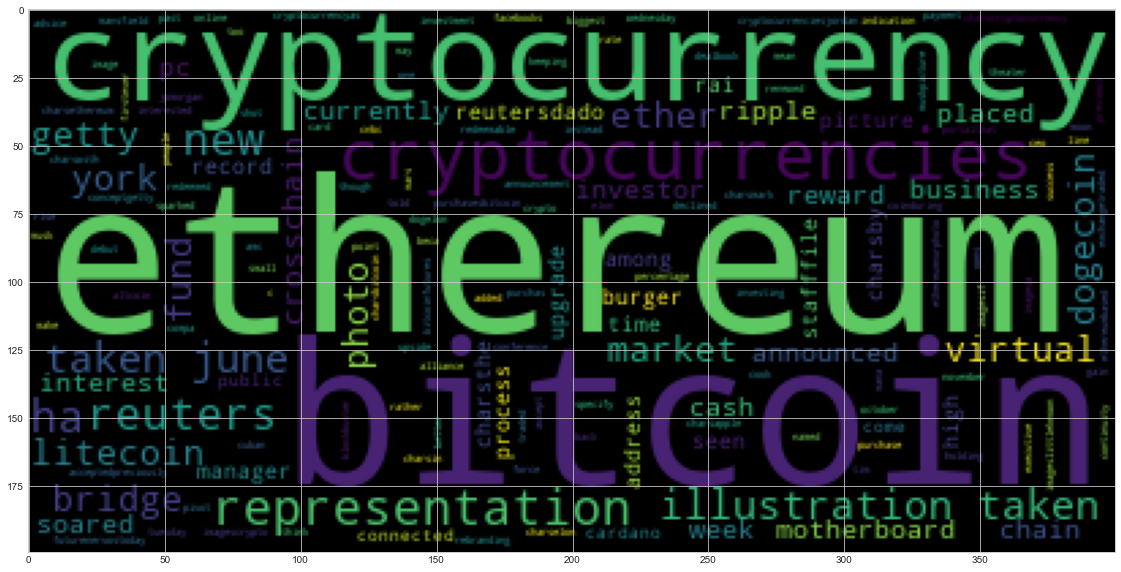

In [38]:
# Generate the Ethereum word cloud
eth_wc = WordCloud().generate(' '.join(ethereum_all_text_processed))
plt.imshow(eth_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [43]:
import spacy
from spacy import displacy

In [44]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [45]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [46]:
# Concatenate all of the Bitcoin text together
bitcoin_all_text = ''.join(btc_df['text'])

In [47]:
# Run the NER processor on all of the text
bitcoin_ner = nlp(bitcoin_all_text)

# Add a title to the document
bitcoin_ner.user_data["title"] = "BTC NER"


In [48]:
# Render the visualization
displacy.render(bitcoin_ner, style='ent')

In [49]:
# List all Entities
for ent in bitcoin_ner.ents:
    print(ent.label_ + ':' + ent.text)

DATE:earlier this year
LAW:Verge
ORG:Vox Media
ORG:Photo Illustration
PERSON:Thiago Prudencio/S
GPE:U.S.
GPE:U.S.
GPE:China
ORG:Bloomberg
ORG:the National Bureau
ORG:AMC
PERSON:Bitcoin
DATE:June 29, 2021
ORG:REUTERS
PERSON:Dado Ruvic/
GPE:IllustrationHONG KONG
DATE:Oct 21
ORG:Reuters
PERSON:Bitcoin
DATE:October 19, 2021
ORG:REUTERS
ORG:Reuters
PERSON:Bitcoin
DATE:October 19, 2021
ORG:REUTERS
PERSON:Edgar SuHONG KONG
ORG:Reuters
DATE:Wednesday
ORDINAL:first
GPE:U.S.
PERSON:Conway G. Gittens
PERSON:Bitcoin
DATE:October 18, 2021
ORG:REUTERS
DATE:Oct 19
ORG:Reuters
DATE:six-month
ORG:+2332 chars]By
ORG:Reuters
GPE:SINGAPORE
ORG:Reuters
DATE:six-month
DATE:Tuesday
GPE:U.S.
ORG:NurPhoto
ORG:Getty Images
ORDINAL:first
DATE:Tuesday
ORG:ProShares
DATE:Bitcoin 2021
PERSON:Marco Bello/
ORG:The Securities and Exchange Commission
PERSON:Valkyrie
ORG:ETF
ORG:ETF
ORG:NurPhoto
ORG:ETF
ORDINAL:first
ORG:ETF
PERSON:Rafael Henrique/SOPA Images/LightRocket
ORG:Getty Images
PERCENT:7%
DATE:Monday
TIME:morn

---

### Ethereum NER

In [50]:
# Concatenate all of the Ethereum text together
ethereum_all_text = ''.join(eth_df['text'])

In [51]:
# Run the NER processor on all of the text
ethereum_ner = nlp(ethereum_all_text)

# Add a title to the document
ethereum_ner.user_data["title"] = "ETH NER"

In [52]:
# Render the visualization
displacy.render(ethereum_ner, style='ent')

In [53]:
# List all Entities
for ent in ethereum_ner.ents:
    print(ent.label_ + ':' + ent.text)

PERSON:Cardano
DATE:Nervos 
DATE:today
FAC:the Force Bridge
NORP:Cuban
ORG:CNBC
DATE:Wednesday
ORG:AMC
CARDINAL:two
PERSON:Jordan Mansfield
ORG:JPMorgan
GPE:beca
PERSON:Musk
ORG:Getty Images
PERSON:Elon Musk
PERCENT:3,780%
DATE:October
ORG:Dogelon Mars
MONEY:0.00000229
DATE:November 1
MONEY:0.0
PERSON:Getty Images
DATE:the past week
ORG:Facebook
PERSON:Tim Cook
ORG:The New York Times'
DATE:Tuesday
PERCENT:1-2%
ORG:Ethereum
ORG:NurPhoto
ORG:Getty Images
ORDINAL:first
ORG:Bitcoin, Ethereum
ORG:DogeCoin
DATE:June 29, 2021
ORG:REUTERS
PERSON:Dado Ruvic/Illustration/File Photo MU
ORG:Burger King
ORG:Robinhood
ORG:Royal Perks
MONEY:5
PERSON:Rai
ORG:Market Neutral
ORG:BlockTower Capital
PERSON:Rahul Rai
PERSON:Crypto
PERSON:Rahul Rai
ORDINAL:second
MONEY:a record above $
MONEY:4,400
DATE:Friday
ORG:Ethereum
ORG:Bitcoin’s
ORDINAL:second
ORG:Reuters
MONEY:a record $6.4 billion
DATE:this year
ORG:CoinShares
DATE:Thursday
TIME:6:13 p.m.
GPE:New York
ORG:Ethereum
CARDINAL:0x8e39
ORG:NFT
ORG:Lionsg

---